**Gruppenmitglieder**: *Bitte angeben*

<table style="display: inline-block">
 <tr>
     <td>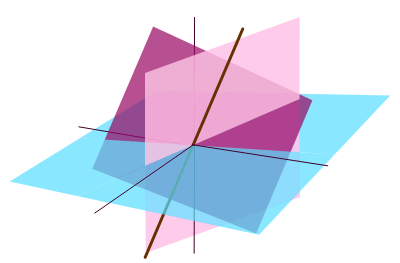</td>  
     <td style="text-align: left">
      <div style="font-size: 20pt; float: left;">Lineare Algebra und Geometrie</div><br>
      <div style="font-size: 20pt;">FS 2021</div><br>
      <div style="font-size: 15pt; margin-top: 10px;">Lucia Di Caro, Tobias Kaufmann</div>
     </td>
 </tr>
</table>

# Programmierübung LAG FS 2021

In dieser bewerteten Programmierübung werden Sie Ihre im Verlauf der Vorlesung erworbenen Python-Kenntnisse auf Probleme der Vektorgeometrie anwenden. Konkret ist das Ziel dieser Programmierübung, für einen Billardtisch vorherzusagen, wo man mit der weissen Kugel eine Bande anspielen muss, um eine andere Kugel zu treffen. Selbstverständlich könnten wir weitere Probleme betrachten, wie zum Beispiel wie eine Kugel über zwei Banden angespielt werden kann oder wie man eine Kugel anspielen muss, damit sie in eines der Löcher geht, doch das lassen wir aus Zeitgründen vorerst aussen vor. Nach dem Lösen dieser Programmierübung sind Sie aber durchaus in der Lage, solche Probleme zu lösen.

Als Vorbereitung auf diese Hauptaufgabe (Aufgabe 5) werden Geraden und typische Problemstellungen im Zusammenhang mit Geraden angeschaut.

* In der ersten Aufgabe geht es um die verschiedenen Darstellungsformen von Geraden im zweidimensionalen Raum. 

* In der zweiten Aufgabe sollen Schnittpunkte von Geraden berechnet werden.

* In der dritten Aufgabe werden Sie Abstände zwischen Punkten und Geraden berechnen.

* In der vierten Aufgabe werden Sie Punkte an Geraden spiegeln.

**Ziel der einzelnen Aufgaben: Machen Sie möglichst alle Rechnungen mit `sympy`, nicht von Hand!**

**zu beachten:**

* Wir stellen Ihnen teilweise schon ein Rahmengerüst der Implementierung zur Verfügung. Verändern Sie bitte diese Gerüste nicht, sondern fügen Sie Ihren Code bei den entsprechenden Kommentaren `# IHR CODE` ein. 

* Sie dürfen in dieses Notebook über den Menüpunkt 'Insert' durchaus weitere Zeilen einfügen. Falls Sie gerne Markdown-Notizen in die Zelle einfügen möchten, können Sie den Modus der Zelle von 'Code' auf 'Markdown' setzen (oder Esc-M drücken).

* Je besser Sie Ihre Berechnungen und Ihren Code kommentieren, desto eher können Sie bei Fehlern noch Teilpunkte erhalten.

**Abgabeformalitäten:**

* Geben Sie das ergänzte Jupyter-Notebook spätestens bis zum **4.6.2021** um **Mitternacht** per Email an [Lucia Di Caro](mailto:lucia.dicaro@fhnw.ch) bzw. an [Tobias Kaufmann](mailto:tobias.kaufmann@fhnw.ch)ab.
* Die Programmierübung lösen Sie in den gleichen Gruppen, in denen Sie die Kurztests bestritten haben. Jede Gruppe gibt zusammen eine Lösung ab.
* Ausserhalb der Gruppen darf durchaus über die Übung diskutiert werden, programmieren soll aber jede Gruppe für sich. Gleichen sich zwei abgegebene Notebooks *aus verschiedenen Gruppen* zu stark, so erhalten beide Parteien eine 1 und es wird eine Meldung an die Studiengangleitung gemacht.

### SymPy

Im Gegensatz zu Numpy arbeitet Sympy mit *Symbolen*. Das heisst, während Numpy immer explizite Zahlen erwartet,  können Sie mit Sympy Ausdrücke wie zum Beispiel $2x+y$ definieren. Sympy bietet unter anderem Funktionalität an, um solche Ausdrücke geeignet umzuformen, zu visualisieren, für gewisse Werte von z.B. $x$ und $y$ auszuwerten und um Lösungen von Gleichungssystemen zu berechnen.

Hier eine Kurzübersicht über die in dieser Übung benötigten Sympy-Befehle. Weitere Informationen können Sie zum Beispiel im [Sympy-Tutorial](https://docs.sympy.org/latest/tutorial/index.html) finden.

* `x = sp.Symbol("x")`, `a, b = sp.symbols("a, b")`: Symbolische Variablen definieren
* `sp.solve()`: Gleichungen und Gleichungssysteme lösen (siehe Übungsblätter)
* `sp.plot()`: Funktionen grafisch darstellen (siehe Beispiel Aufgabe 1)
* `.subs()`, `.evalf()`: In einem symbolischen Ausdruck Werte einsetzen (Substitution), siehe z.B. Aufgabe 4 für eine beispielhafte Verwendung
* `.coeff()`: Koeffizient vor einem Symbol zurückgeben, z.B. gibt `(x+2*y).coeff(y)` die Zahl $2$ zurück
* `sp.Matrix()`: Matrix oder Vektor mit Sympy (statt mit `np.array()`)
* `.norm()`: Berechnet die Norm eines Objekts des Typs `sp.Matrix`

Sympy und Numpy verstehen Sie sich nicht immer perfekt. Lösen Sie Konflikte auf eine möglichst saubere Art, falls Sie für eine Berechung Funktionen aus beiden Python-Modulen verwenden.

Die folgenden Python-Module reichen für das Lösen dieser Programmierübung. Verwenden Sie ausschliesslich diese Module:

In [ ]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 1 (3 Punkte): Geraden im zweidimensionalen Raum

Geraden im zweidimensionalen Raum können auf unterschiedliche Arten beschrieben werden. Dabei unterscheidet man zwischen vektoriellen Beschreibungsformen und der Beschreibung mittels Koordinatengleichungen. In dieser Übung geht es vorwiegend um die Beschreibung mittels Koordinatengleichungen. 

Hier finden Sie eine Zusammenstellung der wichtigsten Beschreibungsformen mittels Koordinatengleichung:

* Gerade als **lineare Funktion** ($m$ ist die Steigung und $q$ der $y$-Achsenabschnitt der Geraden):

$$y=m\cdot x + q$$

* **Normalform** der Geraden als **Koordinatengleichung** ($a$ und $b$ sind die $x$- und $y$-Komponenten des Normalenvektors, in $c$ ist die Information über die Lage der Geraden versteckt):

$$a\cdot x+b\cdot y+c=0$$

* **Normalform mit Vektoren** ($\vec{n}$ ist der Normalenvektor (steht rechtwinklig zur Geraden) und $\vec{r_0}$ ist ein gegebener Ortsvektor zu einem beliebigen aber festen Punkt auf der Geraden):

$$\vec{n}\cdot\left(\vec{r}-\vec{r_0}\right)=0$$

* **Punkt-Steigungsform** ($m$ ist die Steigung der Geraden und $P\left(x_p|y_p\right)$ ein Punkt auf der Geraden):

$$y = m\cdot\left(x-x_p\right)+y_p$$

* **Zweipunktform** ($P_1\left(x_1|y_1\right)$ und $P_2\left(x_2|y_2\right)$ sind zwei Punkte auf der Geraden):

$$y = \frac{y_2-y_1}{x_2-x_1}\cdot\left(x-x_1\right)+y_1$$

Bestimmen Sie die Gleichungen der folgenden Geraden und stellen Sie diese grafisch dar:

# Beispiel

Gerade $g$ mit dem $y$-Achsenabschnitt $q=2$ und der Steigung $m=\frac{1}{2}$.

In [ ]:
# Variablen definieren:
x = sp.Symbol('x')
y = sp.Symbol('y')

# Gerade zusammenstellen:
q = 2
m = 1/2
y = m*x+q

# Plot und Print-Ausgabe:
sp.plot(y)
print('Gerade g: y =', y)

### Teilaufgabe 1a)

Gerade $g_a$ durch die Punkte $P_1\left(-1|2\right)$ und $P_2\left(5|-4\right)$.

In [ ]:
# IHR CODE



### Teilaufgabe 1b)

Gerade $g_b$ durch den Punkt $P\left(-2|1\right)$ parallel zur Geraden mit der Gleichung $y=-2\cdot x+5$. Zeichnen Sie beide Geraden in die gleiche Grafik ein.

**Hinweise:**
* Verwenden Sie `.coeff()`, um die Steigung aus der Gleichung herauszulesen (siehe Beispiel am Anfang der Programmierübung).
* Mehrere Geraden lassen sich durch `sp.plot(Gerade1,Gerade2,...)` in der gleichen Grafik aufzeichnen.
* Mit der Option `legend=1` in `sp.plot()` wird in der Grafik eine Legende angezeigt.

In [ ]:
# IHR CODE



### Teilaufgabe 1c)

Gerade $g_c$ durch den Punkt $Q(1|2)$, welche senkrecht zur Geraden $h$ mit der Gleichung $3\cdot x-4\cdot y + 5 = 0$ verläuft. Zeichnen Sie auch die Gerade $h$ und  den Punkt $Q$ auf.

**Hinweise:**
* Speichern Sie zuerst die linke Seite der Gleichung $3\cdot x-4\cdot y + 5 = 0$ durch `h = 3*x - 4*y + 5` ab.
* Mit `h_solve = sp.solve(h,y)` lässt sich die Gleichung $3\cdot x-4\cdot y + 5 = 0$ nach $y$ auflösen (und somit einfacher plotten).
* Verwenden Sie wieder `.coeff()`, um die Komponenten des Normalenvektors aus der Gleichung von $h$ zu extrahieren (siehe Beispiel am Anfang der Programmierübung).
* Mit der Option `aspect_ratio=[1,1]` in `sp.plot()` werden die Skalen auf der $x$- und der $y$-Achse gleich gewählt.

In [ ]:
# IHR CODE



## Aufgabe 2 (3+2 Punkte): Schnittpunkt zweier Geraden (im zweidimensionalen Raum)

Wenn zwei Geraden im zweidimensionalen Raum mittels Koordinatengleichungen gegeben sind, z.B.

$$\begin{eqnarray*}g_1:&\;a_1 \cdot x + b_1 \cdot y + c_1 = 0\\g_2:&\;a_2 \cdot x + b_2 \cdot y + c_2 = 0\end{eqnarray*}$$

so ergibt sich der Schnittpunkt als Lösung des linearen Gleichungssystems

$$\left|\begin{eqnarray}a_1 \cdot x + b_1 \cdot y + c_1 &=& 0\\ a_2 \cdot x + b_2 \cdot y + c_2 &=& 0\end{eqnarray}\right|$$

Das folgende Beispiel illustriert, wie der Schnittpunkt zweier durch symbolische Ausdrücke gegebenen Geraden berechnet und visualisiert werden kann:

In [ ]:
# Variablen definieren:
x = sp.Symbol('x')
y = sp.Symbol('y')

# Geraden:
g1 = y-(2*x+1)
g2 = x+4*y+12

# Schnittpunkt grafisch visualisieren:
g1_solve = sp.solve(g1, y)
g2_solve = sp.solve(g2, y)
sp.plot(g1_solve[0], g2_solve[0])

# Schnittpunkt berechnen und ausgeben:
S = sp.solve([g1,g2], x, y)
print('Schnnittpunkt S:', S)

### Teilaufgabe 2a)

Bestimmen Sie die Schnittpunkte der folgenden Geradenpaare mit der Funktion `schnittpunkt(g1,g2)` und visualisieren Sie diesen Schnittpunkt:

* $g_1\colon y=4x-1$ und $g_2\colon y=-x-3$


* $h_1\colon x+y-1=0$ und $h_2\colon 2x+2y=2$


* $f_1\colon -6x-3y+5=0$ und $f_2\colon y=1-2x$ 

In [ ]:
# IHR CODE



In [ ]:
# IHR CODE



In [ ]:
# IHR CODE



### Teilaufgabe 2b)

Ein Dreieck ist durch die folgenden Seitengeraden definiert:

$$s_a:\;2\cdot x-y=0$$

$$s_b:\;x+4\cdot y-9=0$$

$$s_c:\;-x+5\cdot y-28 =0$$

Bestimmen Sie die Eckpunkte dieses Dreiecks und stellen Sie es mit Matplotlib (einfacher als mit Sympy) grafisch dar.

In [ ]:
# IHR CODE



## Aufgabe 3 (2+1+5 Punkte): Abstand eines Punktes zu einer Geraden (im zweidimensionalen Raum)

Die Hesse'sche Normalform kann zur Bestimmung des (kürzesten) Abstands $d$ eines Punktes $Q$ zu einer Geraden $g$ mit der Koordinatengleichung $a\cdot x+b\cdot y+c=0$ bzw. der Normalengleichung $\vec{n}\cdot \left(\vec{r}- \vec{r}_0\right)=0$ benutzt werden, indem die Koordinaten des Punktes $Q$ in diese eingesetzt werden und der Betrag bestimmt wird (siehe Folien zu *Vektorgeometrie Teil 2*, die Herleitung involviert hauptsächlich die Anwendung einer Orthogonalprojektion):


$$d=\left| \frac{\vec{n}\cdot \left(\vec{r}_Q - \vec{r}_0\right)}{|\vec{n}|}\right|=\left|\frac{a\cdot x_Q+b\cdot y_Q+c}{\sqrt{a^2+b^2}}\right|.$$

Erhalten wir beim Einsetzen des Punktes den Wert $d = 0$, so liegt der Punkt auf der Geraden (sein Abstand zur Geraden ist Null). Ist $d \neq 0$, so liegt der Punkt nicht auf der Geraden, sondern auf ihrer linken oder rechten bzw. oberen oder unteren Seite. Tatsächlich enthält der obige Ausdruck Informationen darüber, auf welcher Seite der Gerade sich der Punkt $Q$ befindet. Ist nämlich das Vorzeichen des Ausdrucks in den Betragszeichen positiv, so liegt $Q$ auf der Seite der Geraden, in welche ihr Normalenvektor zeigt. Ist der Ausdrucks in den Betragszeichen negativ, so liegt $Q$ auf der zum Normalenvektor gegenüberliegenden Seite der Gerade. Das Vorzeichen hängt also wesentlich von der Wahl der Richtung des Normalenvektors ab.


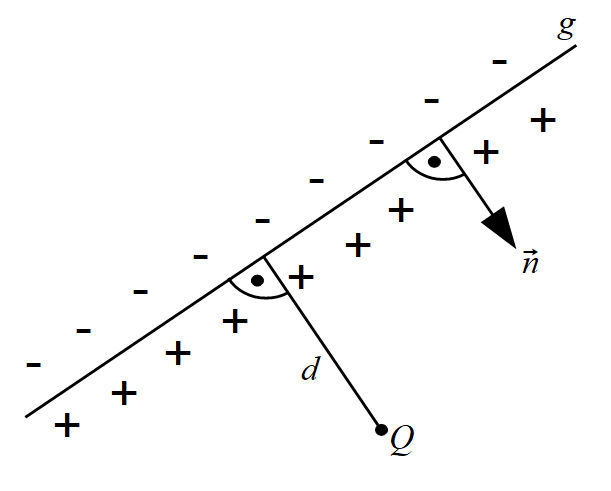

### Teilaufgabe 3a)

Schreiben Sie eine Funktion `abstand(g,Q)` die den Abstand eines Punktes $Q$ zu einer Geraden $g$ bestimmt. Verwenden Sie als Beispiel das folgende Paar $(g,Q)$ mit `abstand(g,Q) = 2.923...`:

In [ ]:
g = 5*x - 12*y + 52
Q = [2,2]

**Hinweise:**
* Extrahieren Sie wieder den Normalenvektor aus $g$.
* Möglicherweise hilft Ihnen hier Code aus dem Beispiel in Aufgabe 4 weiter.

In [ ]:
# IHR CODE



### Teilaufgabe 3b)

Bestimmen Sie die (kürzesten) Abstände, indem Sie Ihre Funktion anwenden:

* Gerade $f\colon 5\cdot x-12\cdot y+9=0$ und Punkt $U\left(1|-1\right)$


* Gerade $g\colon 4\cdot x-3\cdot y+1=0$ und Punkt $V\left(5|2\right)$


* Gerade $h\colon 3\cdot x+3\cdot y-15=0$ und Punkt $W\left(7|-2\right)$

In [ ]:
# IHR CODE



### Teilaufgabe 3c)

Bestimmen Sie die Fläche des Dreiecks mit den Seitengeraden

$$s_a:\;2\cdot x-y=0$$

$$s_b:\;x+4\cdot y-9=0$$

$$s_c:\;-x+5\cdot y-28 =0$$

auf zwei unterschiedliche Arten:
* über eine Höhe des Dreiecks
* über ein Vektorprodukt

In [ ]:
# IHR CODE



## Aufgabe 4 (4 Punkte): Spiegelung eines Punktes an einer Geraden (im zweidimensionalen Raum)

Wir haben schon gesehen, dass der Abstand des Punktes $Q$ von der Geraden $g:\;\vec{n}\cdot\left(\vec{r}-\vec{r_0}\right)=0$ über die Hesse'sche Normalform mit der folgenden Formel bestimmt werden kann:

$$d=\left|\frac{\vec{n}\cdot\left(\vec{r_Q}-\vec{r_0}\right)}{\left|\vec{n}\right|}\right|.$$

Das Vorzeichen des Termes

$$d_\text{Richtung}=\frac{\vec{n}\cdot\left(\vec{r_Q}-\vec{r_0}\right)}{\left|\vec{n}\right|}$$

bestimmt, ob der Punkt $Q$ auf jener Seite liegt, auf welche der Normalenvektor $\vec{n}$ zeigt:
* **Fall 1:** Wenn $d_\text{Richtung}>0$ ist, dann liegt der Punkt $Q$ auf der Seite, auf welche der Normalenvektor $\vec{n}$ zeigt.
* **Fall 2:** Wenn $d_\text{Richtung}<0$ ist, dann liegt der Punkt $Q$ auf der anderen Seite.
* **Fall 3:** Wenn $d_\text{Richtung}=0$ ist, dann liegt der Punkt  auf der Geraden.


Nun spiegeln wir den Punkt $Q$ an der Geraden $g$ und nennen den Spiegelpunkt $S$: Der gespiegelte Punkt $S$ hat von der Geraden $g$ den gleichen Abstand (einfach auf der anderen Seite der Geraden) und somit vom gegebenen Punkt $Q$ den Abstand $2d$. In allen drei Fällen oben gilt für den Verbindungsvektor (hier  hilft es sicher, wenn Sie sich eine  geeignete Skizze anfertigen):

$$
\overrightarrow{QS} = -2\cdot d_\text{Richtung}\cdot \vec{n} = -2\cdot\frac{\left(\vec{n}\cdot\left(\vec{r_Q}-\vec{r_0}\right)\right)}{\left|\vec{n}\right|^2}\cdot\vec{n},
$$

und deshalb ist der Ortsvektor zum Spiegelpunkt $S$ gegeben durch:

$$\vec{r_{S}}=\vec{r_Q}+\overrightarrow{QS} = \vec{r_Q}-2\cdot\frac{\left(\vec{n}\cdot\left(\vec{r_Q}-\vec{r_0}\right)\right)}{\left|\vec{n}\right|^2}\cdot\vec{n} .$$

Im folgenden Beispiel wenden wir diese Formel an.

### Beispiel

Spiegeln Sie den Punkt $P\left(3|1\right)$ an der Geraden $g:\;x-y+1=0$.

In [ ]:
# Definition von g und P
x, y = sp.symbols("x y")
g = x-y+1
P = [3,1]

# Umformen von P in einen Ortsvektor rP
rP = sp.Matrix([[P[0]], [P[1]]])

# Bestimmen des Ortsvektors rS zum Spiegelpunkt S
n = sp.Matrix([[g.coeff(x)],[g.coeff(y)]])
abs_n = n.norm()
hnf_g = g/abs_n
rS = rP - 2*hnf_g.evalf(subs={x:P[0], y:P[1]}) * n/abs_n

# Ausgabe des gespiegelten Punktes S
S = [rS[0], rS[1]]
print('S = ',np.round(np.array(S, dtype=np.float),5))

### Teilaufgabe 4a)

Schreiben Sie eine Funktion `spiegeln(g,Q)`, die für einen gegebenen Punkt $Q$ und eine Gerade $g$ mit der obigen Formel den Spiegelpunkt $S$ berechnet. Prüfen Sie Ihre Funktion am obigen Beispiel.

In [ ]:
# IHR CODE



### Teilaufgabe 4b)

Spiegeln Sie die folgenden Punkte an den gegebenen Geraden mit der Funktion `spiegeln(g,Q)` und geben Sie die Spiegelpunkte aus:

* Gerade $f:\; 3\cdot x-12\cdot y+9=0$ und Punkt $U\left(1|1\right)$


* Gerade $g:\; 4\cdot x-3\cdot y+1=0$ und Punkt $V\left(5|10\right)$


* $x$-Achse und Punkt $W\left(7|-2\right)$

In [ ]:
# IHR CODE



In [ ]:
# IHR CODE



In [ ]:
# IHR CODE



## Aufgabe 5 (6+2+5 Punkte): Reflexion eines Strahls an einer Geraden (im zweidimensionalen Raum)

Beim Billard werden die Kugeln oft über eine oder mehrere Banden gespielt, wenn der direkte Weg durch eine andere Kugel versperrt ist. Beim Spielen über eine Bande gilt das Reflexionsgesetz (Einfallswinkel gleich Ausfallswinkel):
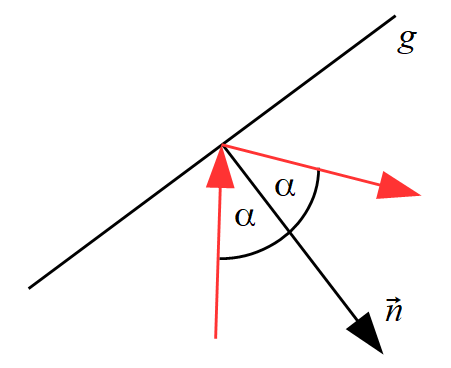

Möchte man nun eine Kugel (Position $A$) über eine Bande auf eine zweite Kugel (Position $B$) spielen, so zielt man auf die (virtuell) gespiegelte Zielkugel (Position $B^{\prime}$):
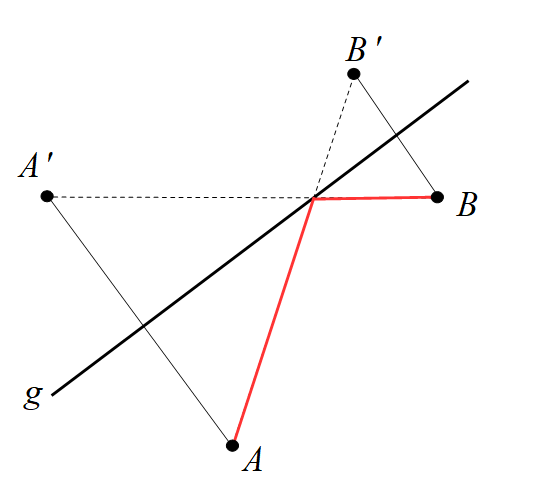

### Teilaufgabe 5a)

Im Punkt $A\left(0|0\right)$ ist eine punktförmige Lichtquelle angebracht. In welche Richtung muss ein Lichtstrahl ausgesendet werden, so dass er nach Reflexion am Spiegel mit der Gleichung $g\colon 3x+y+4=0$ durch den Punkt $B\left(2|5\right)$ geht? Benutzen Sie zur Berechnung der Richtung Ihre Funktion `spiegeln()` aus Aufgabe 4. 
**Visualisieren Sie ausserdem Ihre Resultate**.

**Hinweise:**
* Es kann Sinn machen, eine Funktion `gerade(P,Q)` zu schreiben, die die Zweipunktform (siehe Aufgabe 1) benutzt, um die Koordinatengleichung einer Geraden durch die Punkte $P$ und $Q$ zu bestimmen. Diese Funktion ist auch in Teilaufgabe b) sehr nützlich.
* Mit Matplotlib können Sie einzelne Punkte mit `plt.scatter()` zeichnen und sie mit `plt.text()` anschreiben.

In [ ]:
# IHR CODE



In [ ]:
# IHR CODE



**Visualisierung**

In [ ]:
# IHR CODE



### Teilaufgabe 5b)

Nun nähern wir uns dem Billard-Problem etwas an. Wir möchten berechnen, auf welchen Punkt $R$ einer Bande wir zielen müssen, um mit einer Kugel $A$ eine Zielkugel $B$ anzuspielen. Definieren Sie eine Funktion `reflexionspunkt(P,Q,A,B)`, die für eine durch die Eckpunkte $P$ und $Q$ definierte Bande den Reflexionspunkt $R$ auf der Bande zurückgibt, auf den wir die Kugel $A$ schiessen müssen, damit sie die Zielkugel $B$ erreicht. Verwenden Sie dazu Ihre Resultate aus Teilaufgabe 5a) und verwenden Sie wiederum Ihre Funktion `spiegeln()`. Machen Sie sich dazu eine geeignete Skizze.

Ob Ihre Funktion korrekt funktioniert, sehen Sie bei ihrer Anwendung in Aufgabe 5c).

In [ ]:
# IHR CODE



### Teilaufgabe 5c)

Nun sind wir soweit! Schreiben Sie eine Funktion `billard(P1,P2,P3,P4)` welche:

* Einen grünen Billard-Tisch mit den frei wählbaren Eckpunkten $P_1$, $P_2$, $P_3$ und $P_4$ grafisch darstellt.

* Die Positionen einer zu spielenden weissen Kugel $A$ und einer roten Zielkugel $B$ mittels eines Zufallsgenerators bestimmt und grafisch darstellt.

* Zufällig eine der vier Banden auswählt, über welche die weisse Kugel auf die rote Zielkugel gespielt werden soll. Der Weg der weissen Kugel soll visualisiert werden. Beschriften Sie auch  die vier Banden in der Grafik und geben Sie jeweils einen Text aus, welche der vier Banden zufällig ausgewählt worden ist.

* Die Funktion `reflexionspunkt()` aus 5b) verwendet.

* Verwenden Sie die Eckpunkte $P_1\left(10|20\right)$, $P_2\left(30|20\right)$, $P_3\left(30|50\right)$ und $P_4\left(10|50\right)$, um Ihre Funktion `billard(P1,P2,P3,P4)` zu testen.


**Hinweise**:
* Benutzen Sie zur Generierung von Zufallszahlen für die Position der Kugeln die Funktion `np.random.rand()`, die relle Werte zwischen 0 und 1 erzeugt, und bringen Sie die Zufallswerte geeignet auf die Grösse des Billardtisches.
* Die Funktion `np.random.randint()` generiert nur ganzzahlige Werte. Deshalb eignet sie sich, um zufällig eine der vier Banden zu bestimmen.

In [ ]:
# IHR CODE

